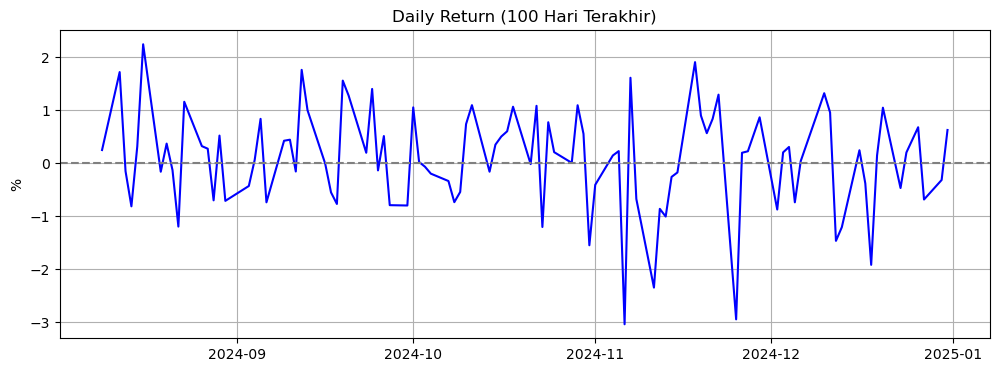

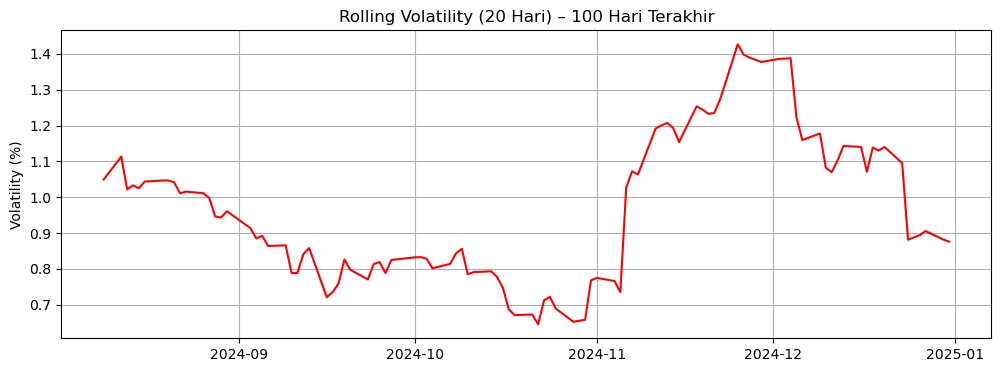

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data GLD
df = pd.read_csv("../data/gld_clean.csv", skiprows=2)
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# === Hitung Return Harian ===
df['Return'] = df['Close'].pct_change() * 100  # Dalam persen

# === Hitung Volatilitas (20 hari) ===
df['Volatility'] = df['Return'].rolling(window=20).std()

# === Visualisasi Return ===
plt.figure(figsize=(12, 4))
plt.plot(df['Return'].tail(100), color='blue')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Daily Return (100 Hari Terakhir)')
plt.ylabel('%')
plt.grid(True)
plt.show()

# === Visualisasi Volatilitas ===
plt.figure(figsize=(12, 4))
plt.plot(df['Volatility'].tail(100), color='red')
plt.title('Rolling Volatility (20 Hari) – 100 Hari Terakhir')
plt.ylabel('Volatility (%)')
plt.grid(True)
plt.show()
